<a href="https://colab.research.google.com/github/tomtomh512/Handwritten-Arithmetic-Calculator-v2/blob/main/ocr_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import cv2
import numpy as np
import os
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

In [39]:
image_path = 'equation.png'

Load image

In [40]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

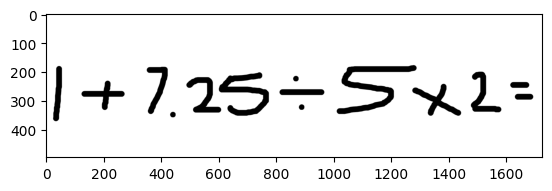

In [41]:
plt.imshow(image, cmap='gray')
plt.show()

Binary image
- All values greater than 128 set to 255 (white)
- All values less than 128 set to 0 (black)
- Invert

In [42]:
threshold, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

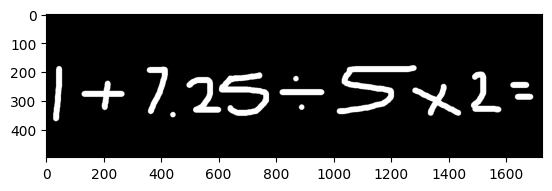

In [43]:
plt.imshow(binary_image, cmap='gray')
plt.show()

Thinning
- Convert 0 to 0, 255 to 1

In [44]:
thinned_image = skeletonize(binary_image / 255)
# thinned_image = (skeleton * 255).astype(np.uint8)

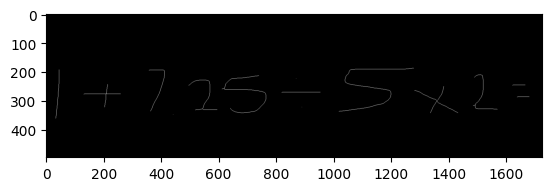

In [45]:
plt.imshow(skeleton, cmap='gray')
plt.show()

Vertical projection

In [46]:
vertical_projection = np.sum(thinned_image, axis=0)

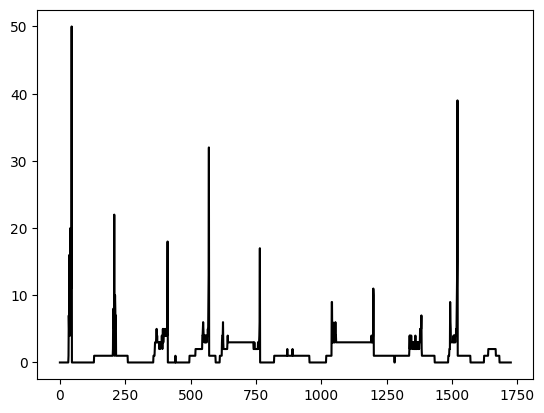

In [47]:
plt.plot(vertical_projection, color='black')
plt.show()

Horizontal projection

In [48]:
horizontal_projection = np.sum(thinned_image, axis=1)

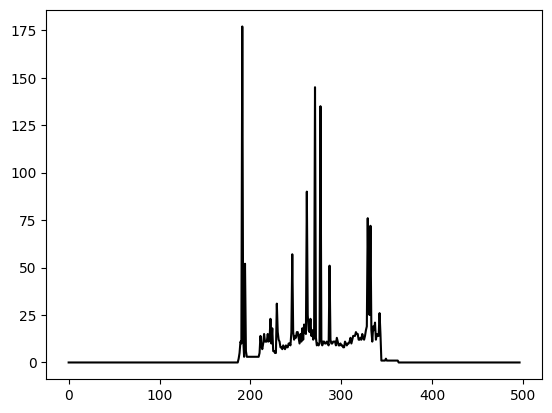

In [49]:
plt.plot(horizontal_projection, color='black')
plt.show()

Finding Bounds

In [50]:
vertical_bounds = []
in_character = False
start = 0

for i, value in enumerate(vertical_projection):
    # when encountering character, log start and set in_character to true
    if value > 0 and not in_character:
        start = i
        in_character = True

    # when leaving character, log end and set in_character to false
    elif value <= 0 and in_character:
        vertical_bounds.append((start, i))
        in_character = False

# if the character continues until the end
if in_character:
    vertical_bounds.append((start, len(vertical_projection)))

In [51]:
horizontal_bounds = []
in_character = False
start = 0

for i, value in enumerate(horizontal_projection):
    # when encountering character, log start and set in_character to true
    if value > 0 and not in_character:
        start = i
        in_character = True

    # when leaving character, log end and set in_character to false
    elif value <= 0 and in_character:
        horizontal_bounds.append((start, i))
        in_character = False

# if the character continues until the end
if in_character:
    horizontal_bounds.append((start, len(horizontal_projection)))

bottom = horizontal_bounds[0][0]
top = horizontal_bounds[0][1]

Store in directory

In [53]:
output_dir = 'segmented_characters'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)


for i, (left, right) in enumerate(vertical_bounds):
    # crop out the character image
    char_image = image[bottom:top, left:right]

    # calculate padding to square image
    height, width = char_image.shape

    if height > width:
      top_padding = 0
      bottom_padding = 0
      left_padding = right_padding = (height - width) // 2
    else:
      left_padding = 0
      right_padding = 0
      top_padding = bottom_padding = (width - height) // 2

    squared_image = cv2.copyMakeBorder(char_image, top_padding, bottom_padding, left_padding, right_padding, cv2.BORDER_CONSTANT, value=255)

    output_path = os.path.join(output_dir, f'char_{i : 03d}.png')
    cv2.imwrite(output_path, squared_image)